# Applying ML Algorithms (Classification) and Data Cleaning #

We are going to use the Pokemon dataset to practice Data cleaning, feature engineering and Classficiation ML algorithms

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

In [2]:
data = pd.read_csv('../input/pokemon.csv')
combats = pd.read_csv('../input/combats.csv')

In [3]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.info()
# Name is not important --> removed
# Type 1, 2, Generation, Legendary, check for the number of categories and distribution
# HP, Attack, Defense,,,etc check for distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


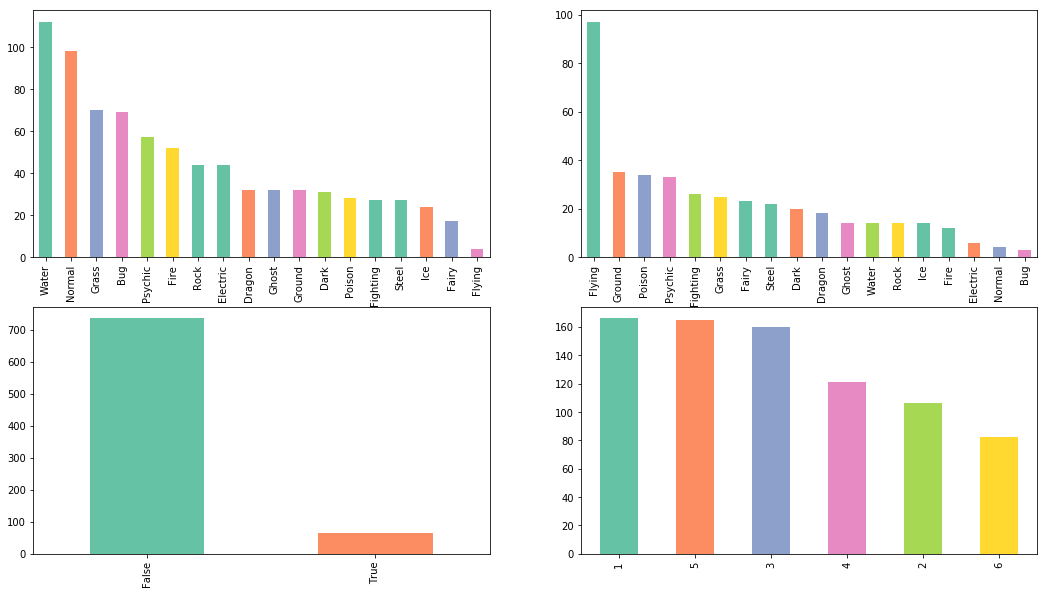

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))

data["Type 1"].value_counts().plot(kind="bar", ax=ax1)
data["Type 2"].value_counts().plot(kind="bar", ax=ax2)
data["Legendary"].value_counts().plot(kind="bar", ax=ax3)
data["Generation"].value_counts().plot(kind="bar", ax=ax4)

# Looks like we could just turn them to dummies

Text(0.5,0,'Sp. Def')

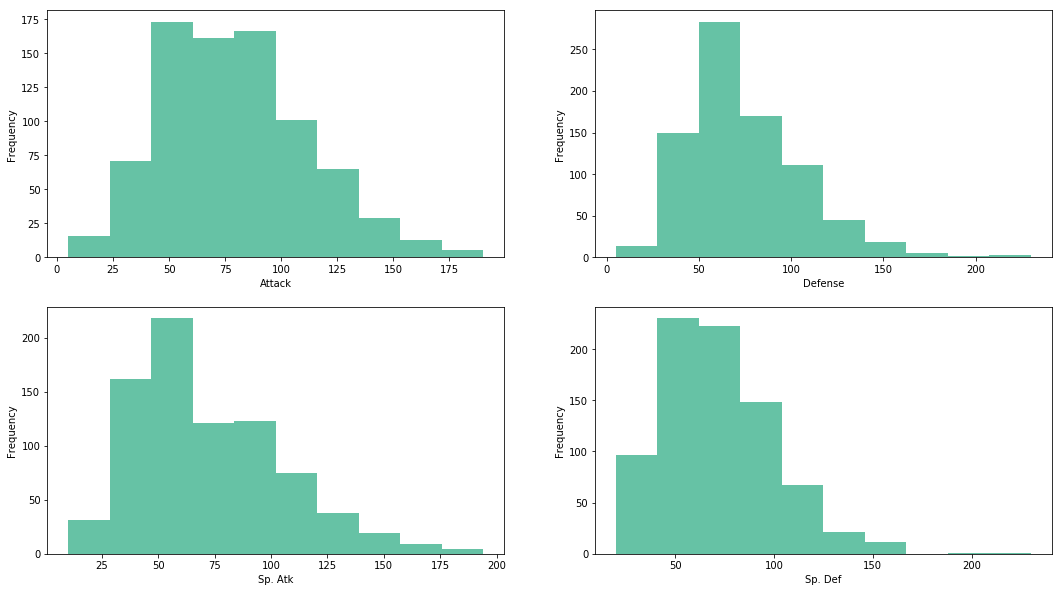

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))

data["Attack"].plot(kind="hist", ax=ax1)
ax1.set_xlabel("Attack")
data["Defense"].plot(kind="hist", ax=ax2)
ax2.set_xlabel("Defense")
data["Sp. Atk"].plot(kind="hist", ax=ax3)
ax3.set_xlabel("Sp. Atk")
data["Sp. Def"].plot(kind="hist", ax=ax4)
ax4.set_xlabel("Sp. Def")

# Distribution looks fine

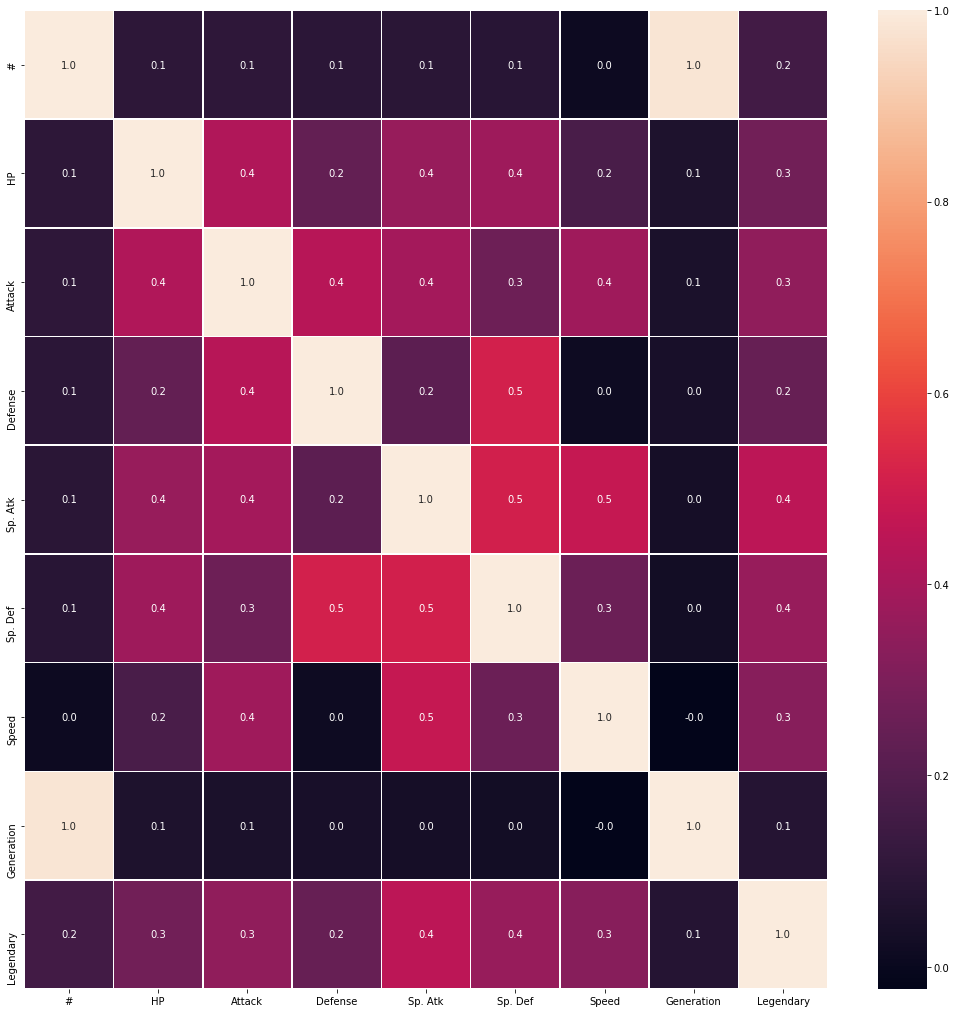

In [7]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# There are some correlation between variables
# plus we have quite a number of data
# so NB might not be the best

In [8]:
# Get dummies for Leg and Gen
data = pd.read_csv('../input/pokemon.csv')
data["Legendary"] = np.where(data['Legendary'] == True , 1, 0)
data = pd.get_dummies(data, columns=['Generation'])

In [9]:
# Get dummies for types
types = set(data['Type 1']).union(set(data['Type 2']))
types = {x for x in types if x==x}

for t in types:
    data[t] = 0
    
for t in types:
    data[t] = np.where(data['Type 1'] == t , 1, np.where(data['Type 2'] == t, 1, 0))

In [10]:
data.drop(['Name','Type 1','Type 2'], inplace=True, axis=1)

In [11]:
data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation_1,Generation_2,...,Psychic,Flying,Rock,Electric,Poison,Normal,Fighting,Dark,Fairy,Ground
0,1,45,49,49,65,65,45,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,60,62,63,80,80,60,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,80,82,83,100,100,80,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,80,100,123,122,120,80,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,39,52,43,60,50,65,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Deal with combats
combats['Winner'] = np.where(combats['Winner'] == combats['First_pokemon'] , 1, 0)

In [13]:
combats2=combats.copy()
combats2.rename({"First_pokemon": "#"}, axis='columns', inplace=True)
combats2 = pd.merge(data, combats2, on="#")

combats2.rename({"#": "First_pokemon", "Second_pokemon": "#"}, axis='columns', inplace=True)
combats2 = pd.merge(data, combats2, on="#")
combats2.head()

,#,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Legendary_x,Generation_1_x,Generation_2_x,...,Flying_y,Rock_y,Electric_y,Poison_y,Normal_y,Fighting_y,Dark_y,Fairy_y,Ground_y,Winner
0,1,45,49,49,65,65,45,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,1,45,49,49,65,65,45,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,45,49,49,65,65,45,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,45,49,49,65,65,45,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,45,49,49,65,65,45,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
combats2.drop(['#','First_pokemon'], inplace=True, axis=1)

In [99]:
# This takes long time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 3)
x,y = combats2.drop(['Winner'],axis=1), combats2['Winner']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8648


In [17]:
y_train[0]

1

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

nb = GaussianNB()
x,y = combats2.drop(['Winner'],axis=1), combats2['Winner']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)

print('With NB accuracy is: ',nb.score(x_test,y_test)) # accuracy

With NB accuracy is:  0.7383333333333333


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtree = DecisionTreeClassifier()
x,y = combats2.drop(['Winner'],axis=1), combats2['Winner']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.941


In [16]:
# Suprisingly the acc is lower! maybe there are too many features, do some engineering!
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators=100)
x,y = combats2.drop(['Winner'],axis=1), combats2['Winner']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ',rf.score(x_test,y_test)) # accuracy

With Random Forest accuracy is:  0.9392


In [14]:
featureImp = pd.DataFrame()
featureImp['feature name'] = x.columns.tolist()
featureImp['feature imp'] = rf.feature_importances_
featureImp.sort_values("feature imp", ascending=False)

,feature name,feature imp
36,Speed_y,0.223644
5,Speed_x,0.216313
32,Attack_y,0.049632
1,Attack_x,0.044629
34,Sp. Atk_y,0.041151
3,Sp. Atk_x,0.038533
31,HP_y,0.034700
0,HP_x,0.034453
35,Sp. Def_y,0.031981
4,Sp. Def_x,0.030966


In [111]:
# This could take a bit long
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svc = SVC()
x,y = combats2.drop(['Winner'],axis=1), combats2['Winner']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
svc.fit(x_train,y_train)
prediction = rfsvcpredict(x_test)

print('With SVC accuracy is: ',svc.score(x_test,y_test)) # accuracy

NameError: name 'rfsvcpredict' is not defined

In [112]:
prediction = svc(x_test)
print('With SVC accuracy is: ',svc.score(x_test,y_test)) # accuracy

TypeError: 'SVC' object is not callable

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
x,y = combats2.drop(['Winner'],axis=1), combats2['Winner']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

print('With Logistic Regression accuracy is: ',lr.score(x_test,y_test)) # accuracy

With Logistic Regression accuracy is:  0.8859333333333334
